In [ ]:
import os
import math
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.style.use("seaborn-dark-palette")

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

<ipython-input-5-f6220830f67a>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-dark-palette")


In [ ]:
df = pd.read_csv('oil and gas stock prices.csv')
df.head()

Date Symbol   Open   High    Low  Close    Volume Currency
0  2000-01-03    XOM  39.75  40.38  38.94  39.16  13458200      USD
1  2000-01-04    XOM  38.69  39.09  38.25  38.41  14510800      USD
2  2000-01-05    XOM  39.00  40.88  38.91  40.50  17485000      USD
3  2000-01-06    XOM  40.31  42.91  40.09  42.59  19462000      USD
4  2000-01-07    XOM  42.97  43.12  42.00  42.47  16603800      USD

# New Section

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.stats.durbin_watson(df['Open'])

0.0008074045516630304

In [ ]:
df.describe().style.background_gradient(cmap="cividis")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39201 entries, 0 to 39200
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      39201 non-null  object 
 1   Symbol    39201 non-null  object 
 2   Open      39201 non-null  float64
 3   High      39201 non-null  float64
 4   Low       39201 non-null  float64
 5   Close     39201 non-null  float64
 6   Volume    39201 non-null  int64  
 7   Currency  39201 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 2.4+ MB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Symbol'].value_counts()

XOM    5647
CVX    5647
COP    5647
VLO    5647
MRO    5647
SLB    5647
MPC    2761
PSX    2558
Name: Symbol, dtype: int64

In [ ]:
df.columns

Index(['Date', 'Symbol', 'Open', 'High', 'Low', 'Close', 'Volume', 'Currency'], dtype='object')

In [ ]:
for y in ['Open', 'High','Volume']:
    fig = px.histogram(df, x ='Date', y = y, color = "Symbol",
                      color_discrete_sequence = px.colors.qualitative.Set2,
                      title = f"Total Trading {y} Distribution of Major Oil Companies")
    fig.update_layout(template = "plotly_dark", font= dict(family = "PT Sans", size=18))
    fig.show()

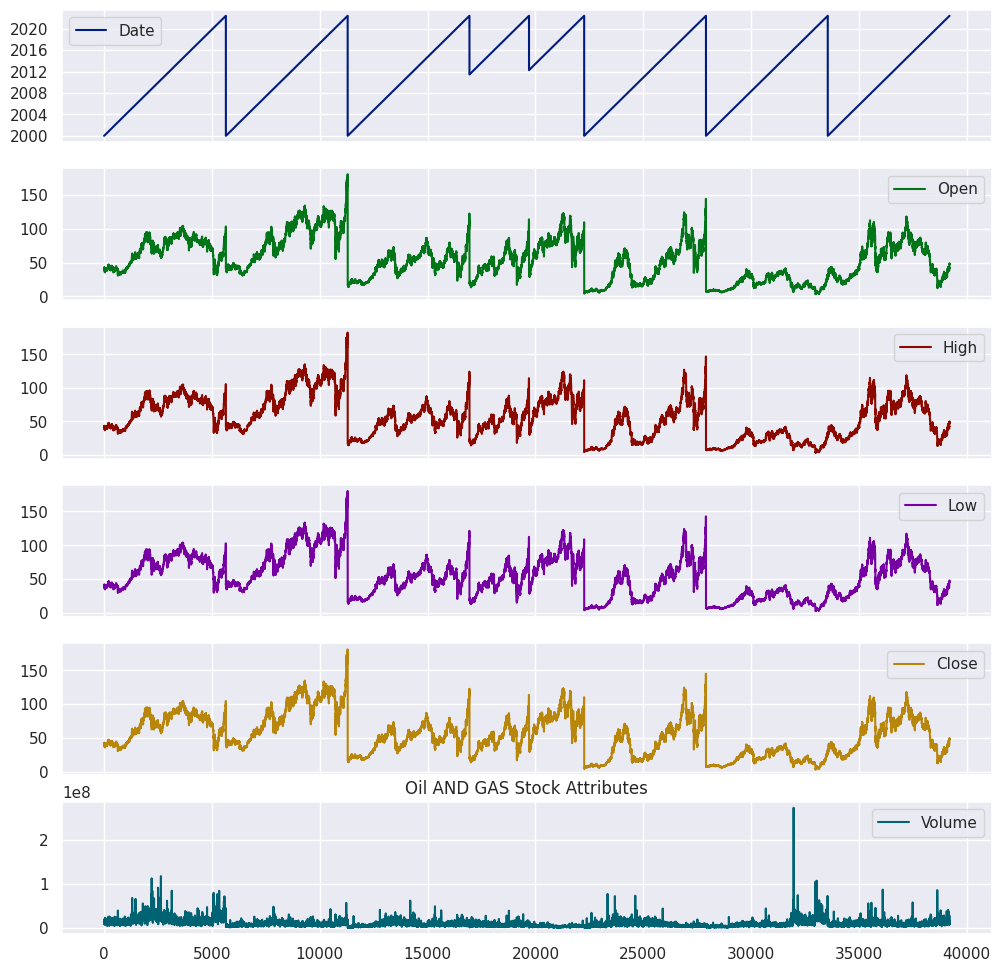

In [ ]:
df.plot(subplots = True, figsize=(12,12), linewidth=1.5)
plt.title("Oil AND GAS Stock Attributes")
plt.show()

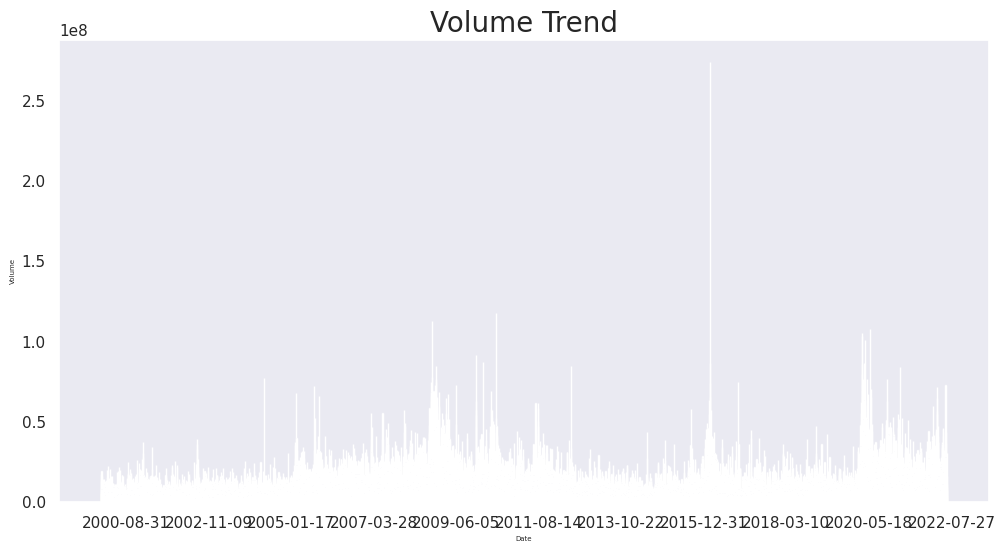

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
#df.plot(subplots = True, figsize=(12,12), linewidth=1.5)
ax.bar(df['Date'], df['Volume'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel("Date", fontsize=5)
ax.set_ylabel("Volume", fontsize=5)
plt.title("Volume Trend", fontsize=20)
plt.grid()
plt.show()

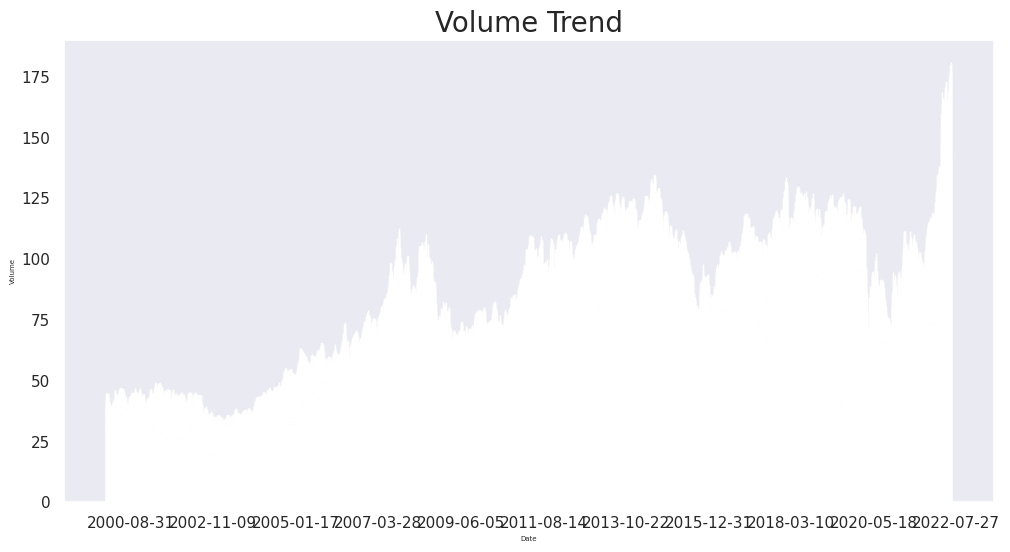

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
#df.plot(subplots = True, figsize=(12,12), linewidth=1.5)
ax.bar(df['Date'], df['Open'])
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel("Date", fontsize=5)
ax.set_ylabel("Volume", fontsize=5)
plt.title("Volume Trend", fontsize=20)
plt.grid()
plt.show()

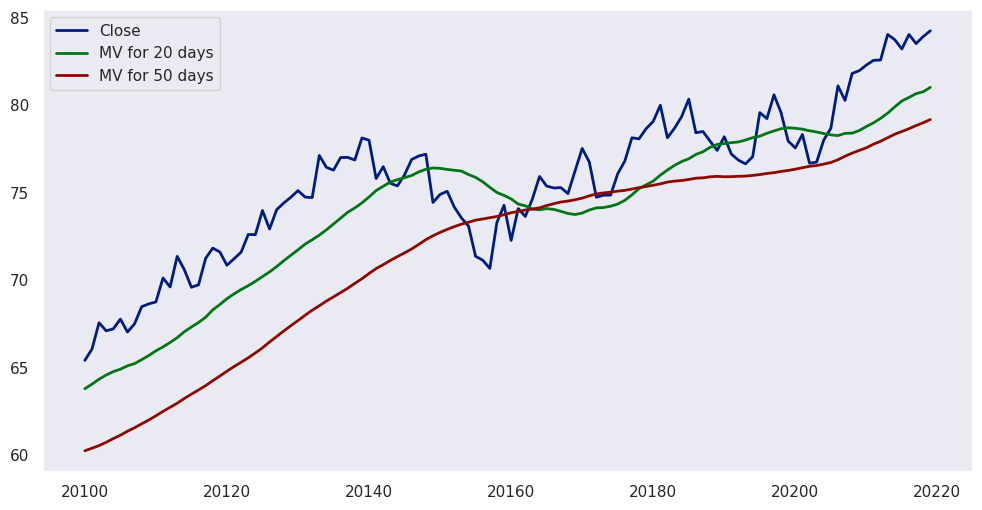

In [ ]:
df["MV for 20 days"] = df["Open"].rolling(20).mean()
df["MV for 50 days"] = df["Open"].rolling(50).mean()

# Visualize moving avg from 2010 to 2022

df.truncate(before="2010-01-01", after = "2022-12-31")[["Close", "MV for 20 days", "MV for 50 days" ]].plot(subplots=False,figsize=(12,6), linewidth=2)
plt.grid()
plt.show()

<ipython-input-19-c190b24f0f2c>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Maximum open price of stock ever obtained : 180.95
Minimum open price of stock ever obtained : 3.22


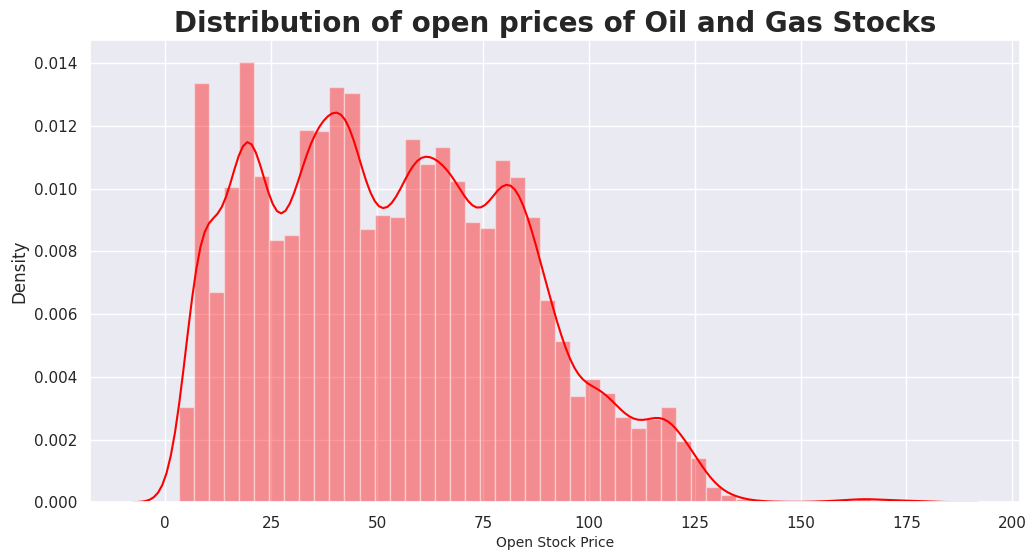

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(df['Open'], color="red")
plt.title("Distribution of open prices of Oil and Gas Stocks", fontweight= "bold", fontsize=20)
plt.xlabel("Open Stock Price", fontsize=10)
print("Maximum open price of stock ever obtained :", df["Open"].max())
print("Minimum open price of stock ever obtained :", df["Open"].min())

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

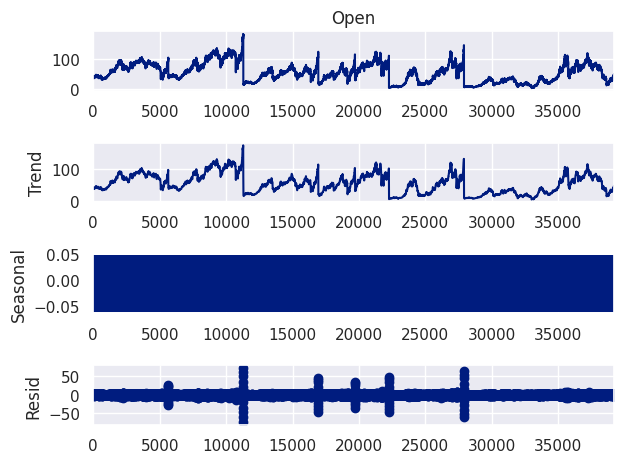

In [ ]:
decomposition = seasonal_decompose(df['Open'], period=12)
decomposition.plot()
plt.show()